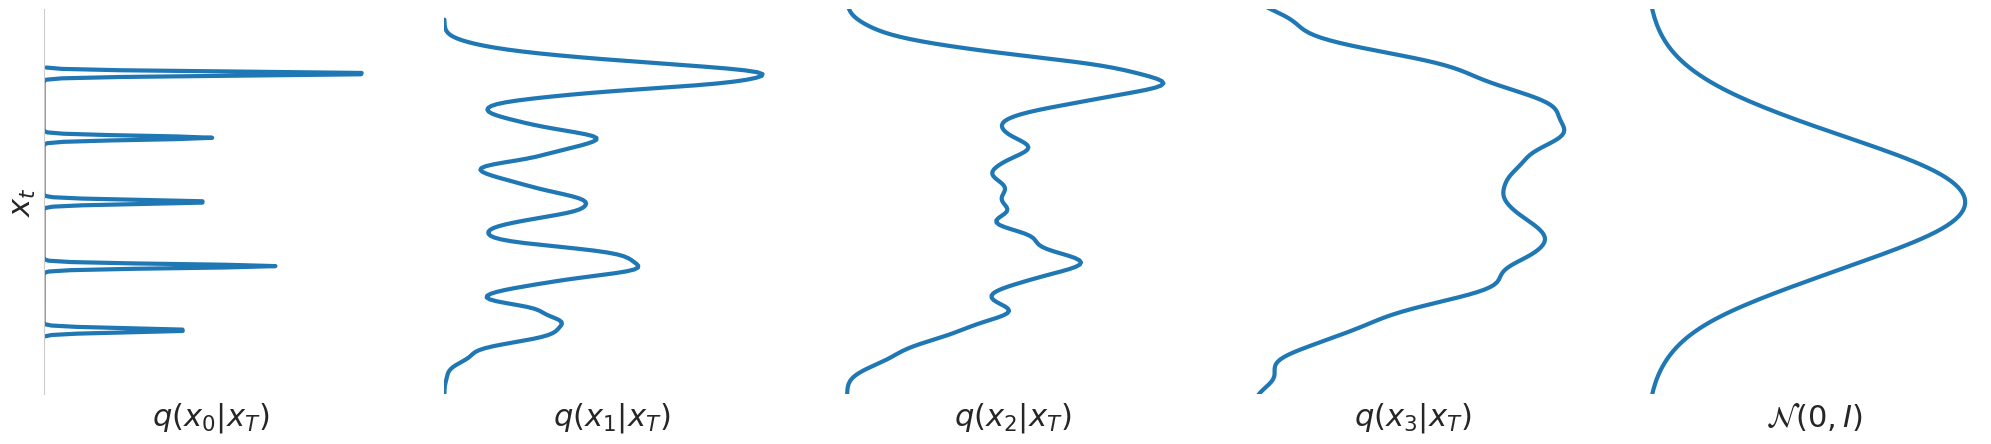

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as sps
import seaborn as sns
sns.set_style('whitegrid')

init = np.concatenate([sps.norm(loc=-2,scale=0.001).rvs(350), sps.norm(loc=-1,scale=0.001).rvs(550), 
                sps.norm(loc=0, scale=0.001).rvs(400), sps.norm(loc=1, scale=0.001).rvs(400),
                      sps.norm(loc=2, scale=0.001).rvs(800)])
beta = 0.001

def get_next(xt):
    xtp1 = sps.norm(xt*(1-beta)**0.5, beta**0.5).rvs(2500)
    return xtp1

xt = np.zeros((10000, 2500))
xt[0] = init

for i in range(1, 1000):
    xt[i] = get_next(xt[i-1])

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(25,5))
nums = [0, 50, 130, 500]
for i in range(5):
    ax = axes[i]
    ax.set_ylim(bottom=-3, top=3)
    if i < 4:
        sns.kdeplot(y=xt[nums[i]], lw=3, bw_adjust=0.1 + i *0.15, ax=ax)
        ax.set_ylabel("$x_t$", fontsize=22)
        ax.set_xlabel(f"$q(x_{i}|x_T)$", fontsize=22)
    else:
        sns.kdeplot(y = sps.norm(0,1).rvs(100000), lw=3, bw_adjust=3, ax=ax)
        ax.set_xlabel("$\mathcal{N}(0,I)$", fontsize=22)
    

plt.grid()
for i in range(5):
    if i == 0:
        axes[i].set_yticks([])
    else:
        axes[i].get_yaxis().set_visible(False)
    axes[i].set_xticks([])
    
    if i!=0:
        axes[i].spines['left'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    
#plt.savefig("C:/Users/Nikita/Desktop/6сем/2023-Project-124/slides/figures/distributions.png", bbox_inches='tight')

plt.show()